# SSIM
 
  
### 밝기 비교
$l(x,y) = {{2\mu_x\mu_y + C_1}\over{{\mu_x}^2+{\mu_y}^2+C_1}}$

### 콘트라스트 비교
$c(x,y) = {{2\sigma_x\sigma_y+C_2} \over {{\sigma_x}^2+{\sigma_y}^2+C_2}}$

### 구조 비교
$s(x,y) = {{\sigma_{xy}+C_3}\over{\sigma_x\sigma_y+C_3}}$

### SSIM
$SSIM(x,y) = {l(x,y)c(x,y)s(x,y)}$

데이터는 (H,W,C) 라 가정
=> (C,H,W)로 변경 후 구하기

In [3]:
import numpy as np

In [13]:
aa = np.array([[1,2,3],[4,5,6]])

In [18]:
3**(1/2)

1.7320508075688772

In [220]:
import numpy as np
def ssim(x,y,window):
    x = np.transpose(x, axes=(2,0,1))
    x = np.array([np.pad(x[i],((window-1,window-1),(window-1,window-1)),mode="constant") for i in range(3)])
    y = np.transpose(y, axes=(2,0,1))
    y = np.array([np.pad(y[i],((window-1,window-1),(window-1,window-1)),mode="constant") for i in range(3)])
    c1 = (0.01 * 255)**2
    c2 = (0.03 * 255)**2
    c3 = c2/2
    _ssim_map = np.zeros(shape=(x.shape[1]-window+1,x.shape[2]-window+1))
    ssim_map = np.zeros(shape=(x.shape[1]-2*window+2,x.shape[2]-2*window+2))
    for h in range(_ssim_map.shape[0]):
        for w in range(_ssim_map.shape[1]):
            x_copy = np.array([x[i][h:h+window,w:w+window] for i in range(3)])
            y_copy = np.array([y[i][h:h+window,w:w+window] for i in range(3)])
            mu_x = [x_copy[i].mean() for i in range(3)]
            mu_y = [y_copy[i].mean() for i in range(3)]
            sigma_x = [(((x_copy[i]-mu_x[i])**2).mean())**(1/2) for i in range(3)]
            sigma_y = [(((y_copy[i]-mu_y[i])**2).mean())**(1/2) for i in range(3)]
            sigma_xy = [((x[i]-mu_x[i])*(y[i]-mu_y[i])).mean() for i in range(3)]
            l_xy = [(2*mu_x[i]*mu_y[i]+c1)/(mu_x[i]**2 + mu_y[i]**2 + c1) for i in range(3)]
            c_xy = [(2*sigma_x[i]*sigma_y[i]+c2)/(sigma_x[i]**2 + sigma_y[i]**2 + c2) for i in range(3)]
            s_xy = [(sigma_xy[i]+c3)/(sigma_x[i]*sigma_y[i]+c3) for i in range(3)]
#                 print(len(l_xy), len(c_xy),len(s_xy))
            _ssim_map[h][w] = np.mean([l_xy[i] * c_xy[i] * s_xy[i] for i in range(3)])
    print(_ssim_map.shape)
    print(ssim_map.shape)
    for h in range(_ssim_map.shape[0]-window+1):
        for w in range(_ssim_map.shape[0]-window+1):
            ssim_map[h][w] = np.mean(_ssim_map[h:h+window,w:w+window])
    ssim_map = (ssim_map*255).astype("uint8")
#     mu_x = [x[i].mean() for i in range(3)]
#     mu_y = [y[i].mean() for i in range(3)]
#     sigma_x = [(((x[i]-mu_x[i])**2).mean())**(1/2) for i in range(3)]
#     sigma_y = [(((y[i]-mu_y[i])**2).mean())**(1/2) for i in range(3)]
#     sigma_xy = [((x[i]-mu_x[i])*(y[i]-mu_y[i])).mean() for i in range(3)]
#     l_xy = [(2*mu_x[i]*mu_y[i]+c1)/(mu_x[i]**2 + mu_y[i]**2 + c1) for i in range(3)]
#     c_xy = [(2*sigma_x[i]*sigma_y[i]+c2)/(sigma_x[i]**2 + sigma_y[i]**2 + c2) for i in range(3)]
#     s_xy = [(sigma_xy[i]+c3)/(sigma_x[i]*sigma_y[i]+c3) for i in range(3)]
#     return np.mean(l_xy), np.mean(c_xy), np.mean(s_xy), np.mean([l_xy[i] * c_xy[i] * s_xy[i] for i in range(3)])
    return ssim_map

In [237]:
np.random.normal()

-1.0204200056312136

In [232]:
example1 = pimg.open("./railroad-163518_640.jpg").resize((256,256)).convert("RGB")
example2 = pimg.open("./railroad-163518_640.jpg").resize((64,64)).resize((256,256)).convert("RGB")

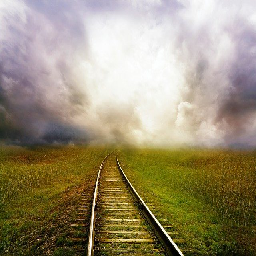

In [233]:
example1

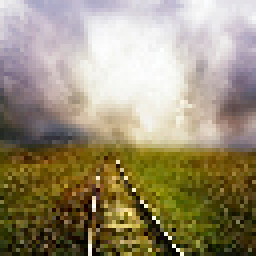

In [234]:
example2

In [235]:
%%time
s = ssim(np.array(example1), np.array(example2),2)

(257, 257)
(256, 256)
Wall time: 50.2 s


In [238]:
s

array([[ 23, 134, 156, ..., 110,  63, 194],
       [ 14,  79, 112, ...,  82, 107, 134],
       [216,  88,   2, ...,  17, 145, 189],
       ...,
       [ 87,  31, 146, ..., 132, 253,  16],
       [195,  35, 217, ..., 183,  40,  44],
       [ 15,  68,  28, ...,  87,  87,  10]], dtype=uint8)

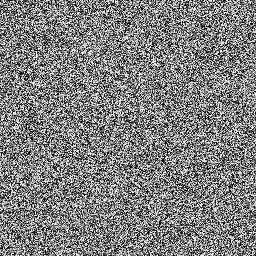

In [236]:
pimg.fromarray(s)

In [42]:
example2 = example1.resize((128,128)).resize((512,512))

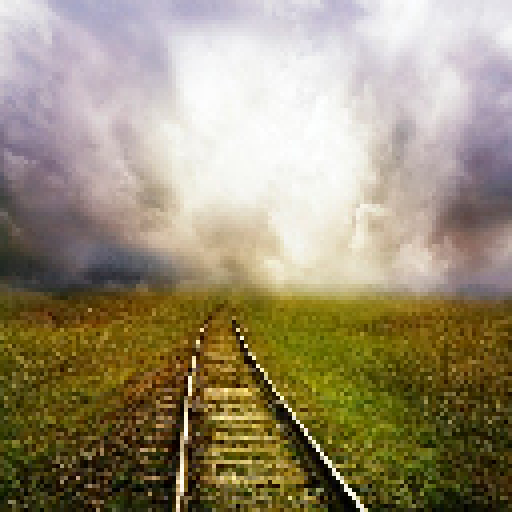

In [43]:
example2

In [132]:
ssim(np.array(example1),np.array(example2))

TypeError: zeros() missing required argument 'shape' (pos 1)

In [124]:
aa = np.array([[1,2],[3,4]])

In [125]:
aa

array([[1, 2],
       [3, 4]])

In [126]:
cc=np.pad(aa,((2,2),(2,2)),mode="constant")

In [127]:
cc

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0],
       [0, 0, 3, 4, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [129]:
cc[0:4,0:4]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 2],
       [0, 0, 3, 4]])

In [130]:
cc[1:5,1:5]

array([[0, 0, 0, 0],
       [0, 1, 2, 0],
       [0, 3, 4, 0],
       [0, 0, 0, 0]])